In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
timeline = '/content/UNRATE (1).csv'
macro_data = pd.read_csv(timeline, parse_dates=['date'], index_col='date')
print(macro_data.shape)  # (173, 3)
macro_data.head()

(293, 2)


,unem,gdpgwth
date,,
1948-01-01,3.733333,2.30880
1948-04-01,3.666667,2.56828
1948-07-01,3.766667,2.43206
1948-10-01,3.833333,0.41906
1949-01-01,4.666667,-1.90180


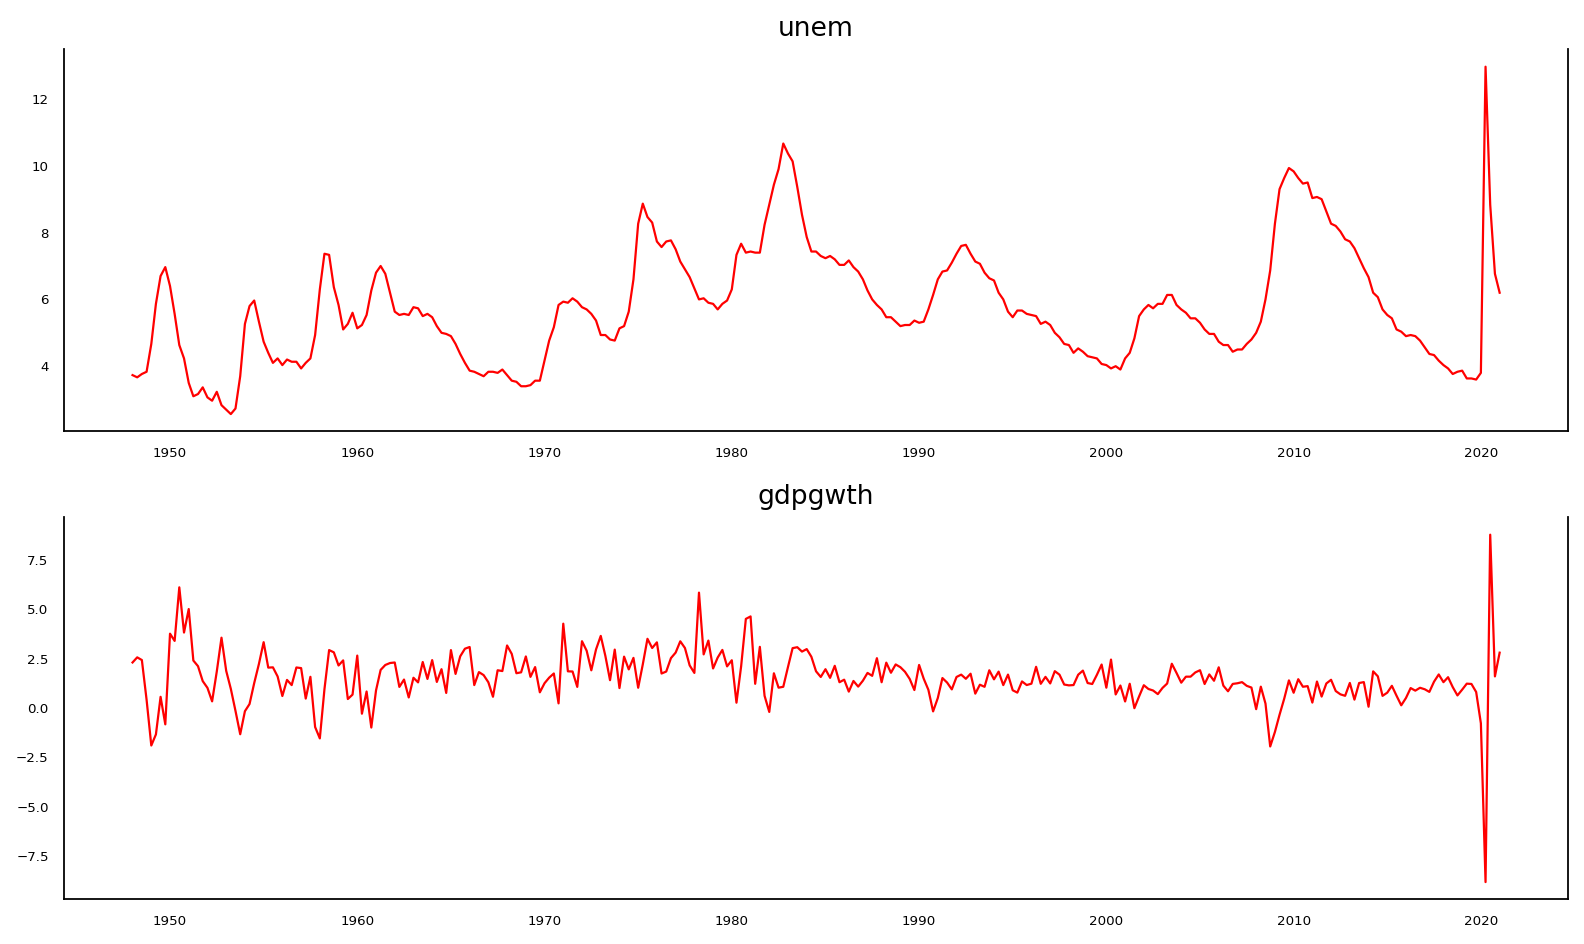

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=160, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
ad_fuller_result_1 = adfuller(macro_data['unem'])

print('gdpgwth')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['gdpgwth'])

print('unem')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')



gdpgwth
ADF Statistic: -3.751996488488202
p-value: 0.003438460182366685

---------------------

unem
ADF Statistic: -8.419007512435941
p-value: 2.0071393374191962e-13


In [ ]:
print('unemployment causes gdpgwth pop?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['unem', 'gdpgwth']], 3)

print('\gdpgwth pop causes unemployed?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['gdpgwth', 'unem']], 3)

unemployment causes gdpgwth pop?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.2694 , p=0.0005  , df_denom=289, df_num=1
ssr based chi2 test:   chi2=12.3968 , p=0.0004  , df=1
likelihood ratio test: chi2=12.1409 , p=0.0005  , df=1
parameter F test:         F=12.2694 , p=0.0005  , df_denom=289, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.4690  , p=0.0003  , df_denom=286, df_num=2
ssr based chi2 test:   chi2=17.2341 , p=0.0002  , df=2
likelihood ratio test: chi2=16.7430 , p=0.0002  , df=2
parameter F test:         F=8.4690  , p=0.0003  , df_denom=286, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.5353  , p=0.0003  , df_denom=283, df_num=3
ssr based chi2 test:   chi2=20.0908 , p=0.0002  , df=3
likelihood ratio test: chi2=19.4255 , p=0.0002  , df=3
parameter F test:         F=6.5353  , p=0.0003  , df_denom=283, df_num=3
\gdpgwth pop causes unemployed?

--------

In [ ]:
macro_data = macro_data[['unem','gdpgwth']]
print(macro_data.shape)

(293, 2)


In [ ]:
train_df=macro_data[:-20]
test_df=macro_data[-20:]

In [ ]:
print(test_df.shape)

(20, 2)


In [ ]:
model_m = VAR(train_df.diff()[1:])

In [ ]:
sorted_order=model_m.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -1.867      -1.839      0.1545      -1.856
1       -2.846      -2.762     0.05809      -2.812
2       -3.052      -2.912     0.04728      -2.995
3       -3.172     -2.976*     0.04194     -3.093*
4       -3.186      -2.934     0.04132      -3.085
5       -3.192      -2.884     0.04110      -3.068
6       -3.197      -2.832     0.04091      -3.050
7       -3.206      -2.786     0.04054      -3.037
8       -3.241      -2.765     0.03913      -3.050
9       -3.227      -2.695     0.03969      -3.013
10      -3.237      -2.648     0.03933      -3.000
11      -3.239      -2.595     0.03923      -2.980
12      -3.263      -2.562     0.03833      -2.981
13      -3.273      -2.517     0.03794      -2.969
14      -3.247      -2.435     0.03896      -2.920
15      -3.271      -2.402     0.03807      -2.921
16     -3.284*      -2.360    0

In [ ]:
var_model = VARMAX(train_df, order=(3,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                            Statespace Model Results                           
Dep. Variable:     ['unem', 'gdpgwth']   No. Observations:                  273
Model:                          VAR(3)   Log Likelihood                -360.206
                           + intercept   AIC                            754.411
Date:                 Wed, 07 Jun 2023   BIC                            815.772
Time:                         13:34:24   HQIC                           779.043
Sample:                     01-01-1948                                         
                          - 01-01-2016                                         
Covariance Type:                   opg                                         
Ljung-Box (L1) (Q):             0.20, 0.18   Jarque-Bera (JB):         41.65, 72.36
Prob(Q):                        0.65, 0.67   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.43, 0.42   Skew:                       0.58, 0.55
Prob(H) (two-sided):        

In [ ]:
n_forecast = 20
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [ ]:
predictions.columns=['unem_predicted','gdpgwth_predicted']
predictions

,unem_predicted,gdpgwth_predicted
2016-04-01,4.869372,0.740753
2016-07-01,4.854110,0.872823
2016-10-01,4.859922,1.042101
2017-01-01,4.881516,1.134784
2017-04-01,4.912491,1.225168
2017-07-01,4.952223,1.287609
2017-10-01,4.996832,1.339654
2018-01-01,5.044583,1.380698
2018-04-01,5.093341,1.414118
2018-07-01,5.141705,1.441582


In [ ]:
macro_data


,unem,gdpgwth
date,,
1948-01-01,3.733333,2.30880
1948-04-01,3.666667,2.56828
1948-07-01,3.766667,2.43206
1948-10-01,3.833333,0.41906
1949-01-01,4.666667,-1.90180
...,...,...
2020-01-01,3.800000,-0.77626
2020-04-01,12.966667,-8.82764
2020-07-01,8.833333,8.78811


In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<Axes: >

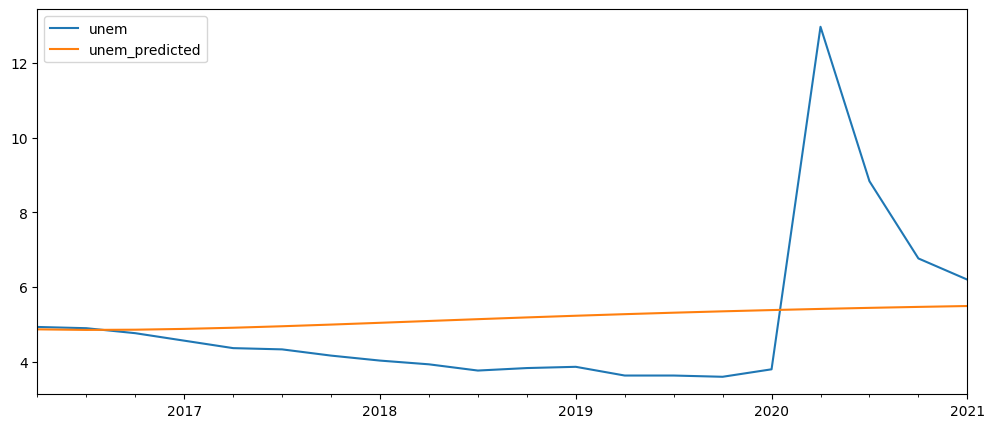

In [ ]:
test_vs_pred=pd.concat([test_df['unem'],predictions['unem_predicted']],axis=1)
test_vs_pred.plot(figsize=(12,5))


<Axes: >

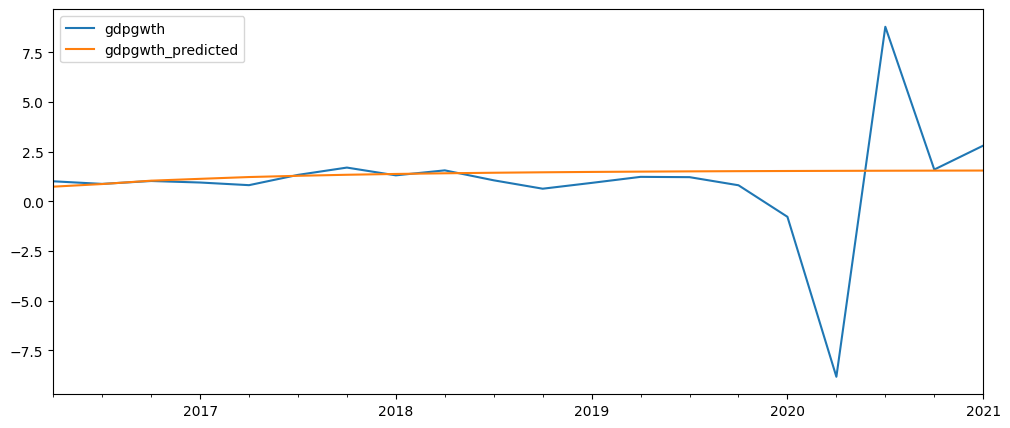

In [ ]:
test_vs_pred=pd.concat([test_df['gdpgwth'],predictions['gdpgwth_predicted']],axis=1)
test_vs_pred.plot(figsize=(12,5))

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_unem=math.sqrt(mean_squared_error(predictions['unem_predicted'],test_df['unem']))
print('Mean value of ULC is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['unem']),rmse_unem))

rmse_gdpgwth=math.sqrt(mean_squared_error(predictions['gdpgwth_predicted'],test_df['gdpgwth']))
print('Mean value of RGNP is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['gdpgwth']),rmse_gdpgwth))

Mean value of ULC is : 5.045. Root Mean Squared Error is :2.1357497553491362
Mean value of RGNP is : 1.003878. Root Mean Squared Error is :2.907187152278417


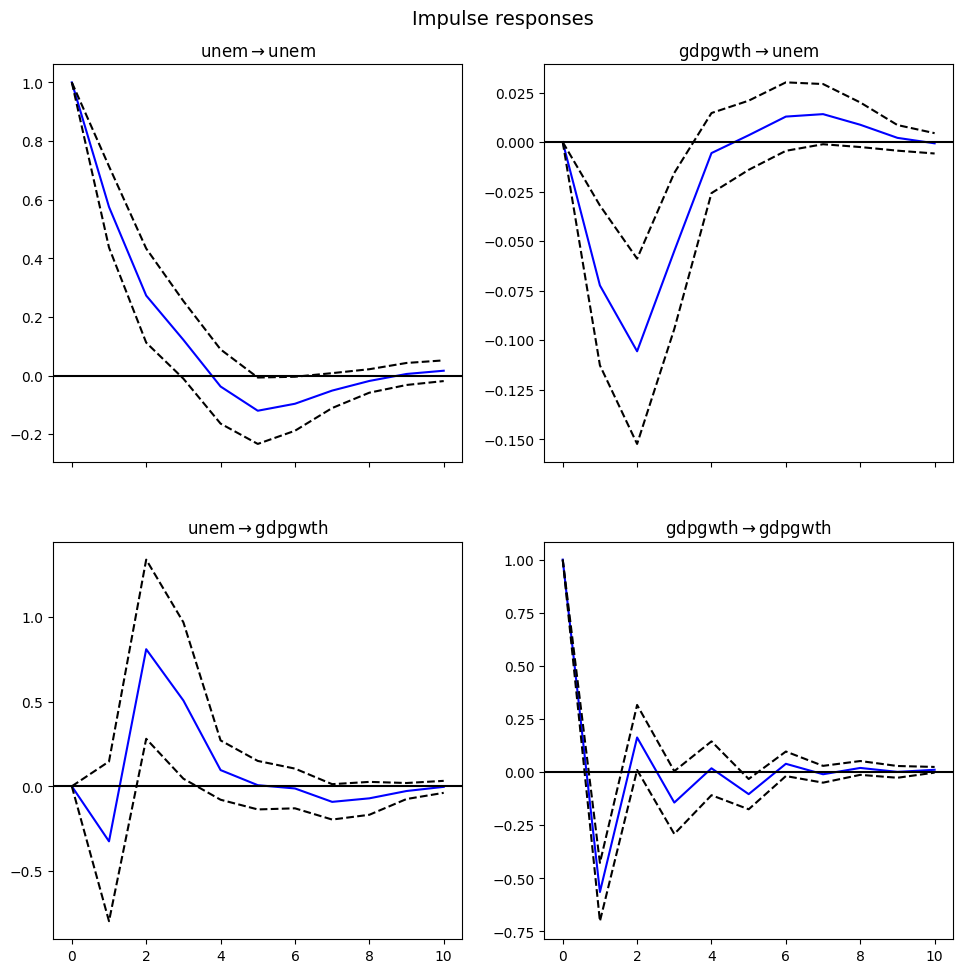

In [ ]:
model_macro = model_m.fit(maxlags=20, ic='bic')
irf = model_macro.irf(10)
irf.plot(orth=False)
plt.show()

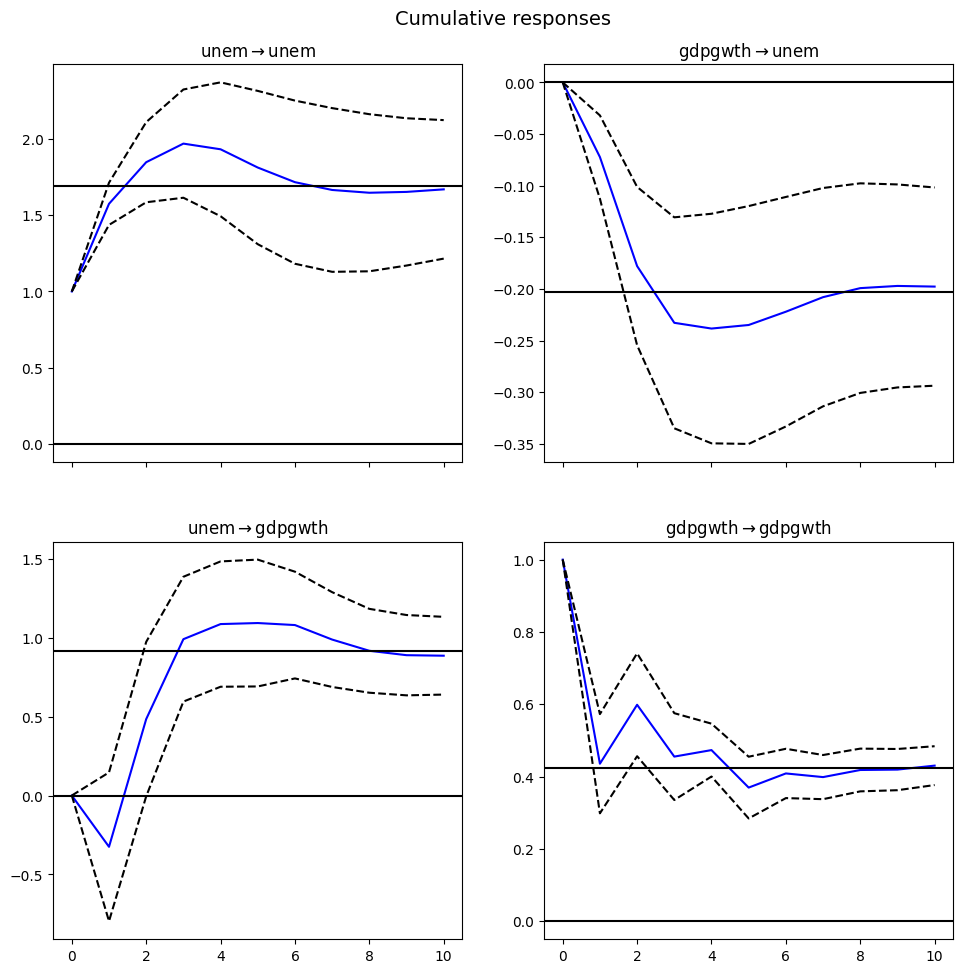

In [ ]:
irf.plot_cum_effects(orth=False)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

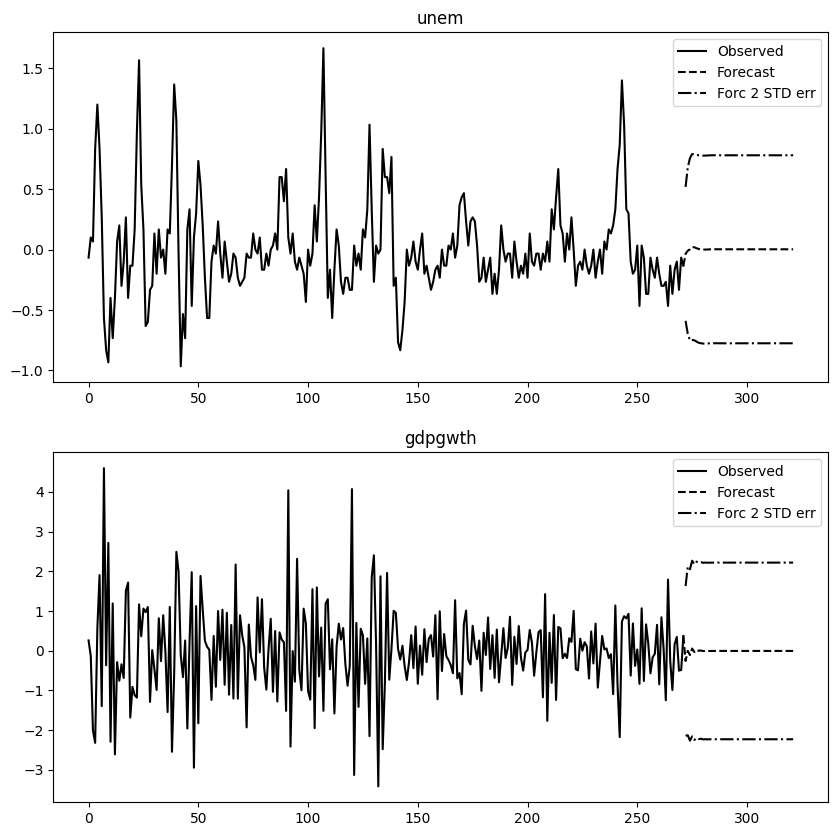

In [ ]:
model_macro.plot_forecast(50)
plt.show